In [1]:
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from tabulate import tabulate
from src import camvid
from src import evaluate
from src import predict
from src import predict_video
from src.tiramisu import tiramisu
from src.wrappers import MonteCarlo
%matplotlib inline

Using TensorFlow backend.


In [2]:
# the location to save fine training weights to
weights = 'models/Tiramisu103-CamVid11-fine.h5'

In [3]:
# the size to crop images to for fine tune training
crop_size = (352, 480)

In [4]:
camvid11 = camvid.CamVid(
    mapping=camvid.load_mapping(),
    target_size=(360, 480),
    crop_size=crop_size,
    horizontal_flip=True,
    ignored_labels=['Void'],
)
generators = camvid11.generators()

Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 233 images belonging to 1 classes.
Found 233 images belonging to 1 classes.


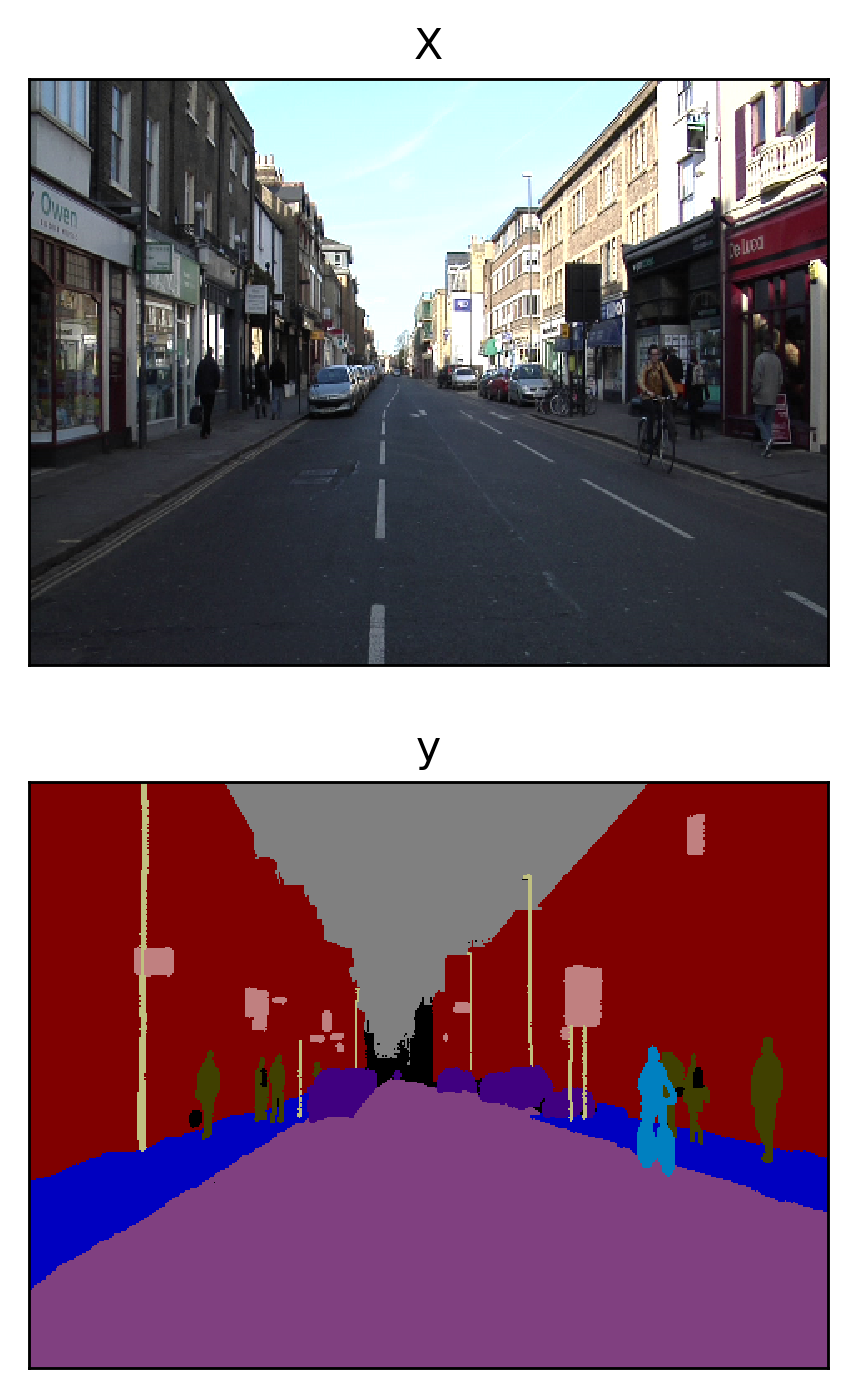

In [5]:
# get the next X, y training tuple
X, y = next(generators['train'])
# transform the onehot vector to an image
y = camvid11.unmap(y)
# plot the images
_ = camvid.plot(X=X[0], y=y[0], order=['X', 'y'])

In [6]:
# build the model for the image shape and number of labels
model = tiramisu.tiramisu((*crop_size, 3), camvid11.n, class_weights=camvid11.class_mask, mc_dropout=True)
model.load_weights(weights)

# Test Metrics

In [7]:
# wrap the model with the test time Monte Carlo
model = MonteCarlo(model, 50, uncertainty='entropy')

In [ ]:
metrics = evaluate.evaluate(model, generators['test'], 233,
    mask=camvid11.class_mask, 
    label_map=camvid11.label_to_discrete_map
)
metrics

In [ ]:
print(tabulate(metrics, tablefmt='pipe', headers=('Metric', 'Value')))

# Qualitative Results

## Train

In [8]:
X, y, p, s = predict.predict_epistemic(model, generators['train'], camvid11)

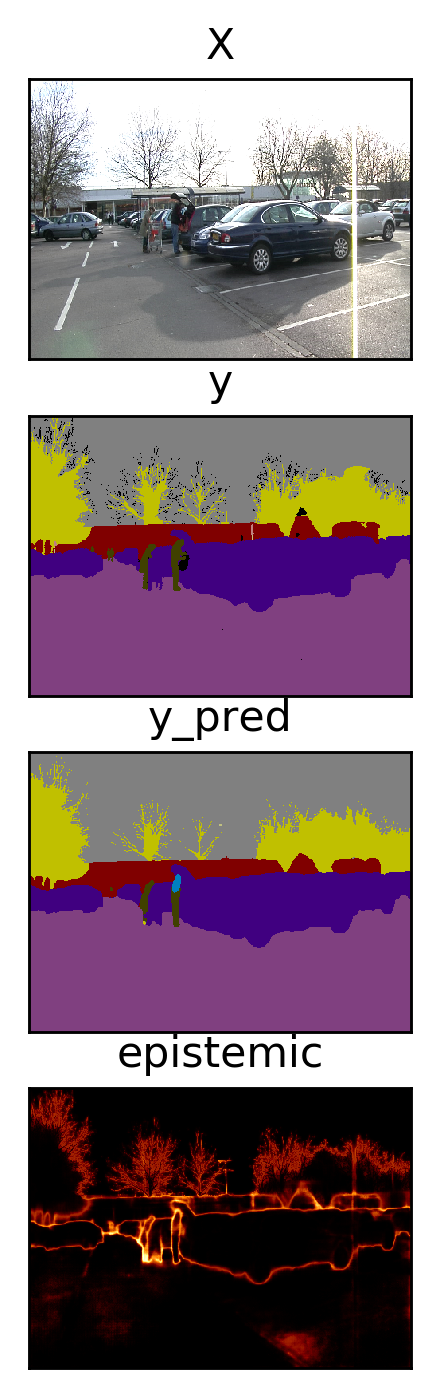

In [9]:
_ = camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

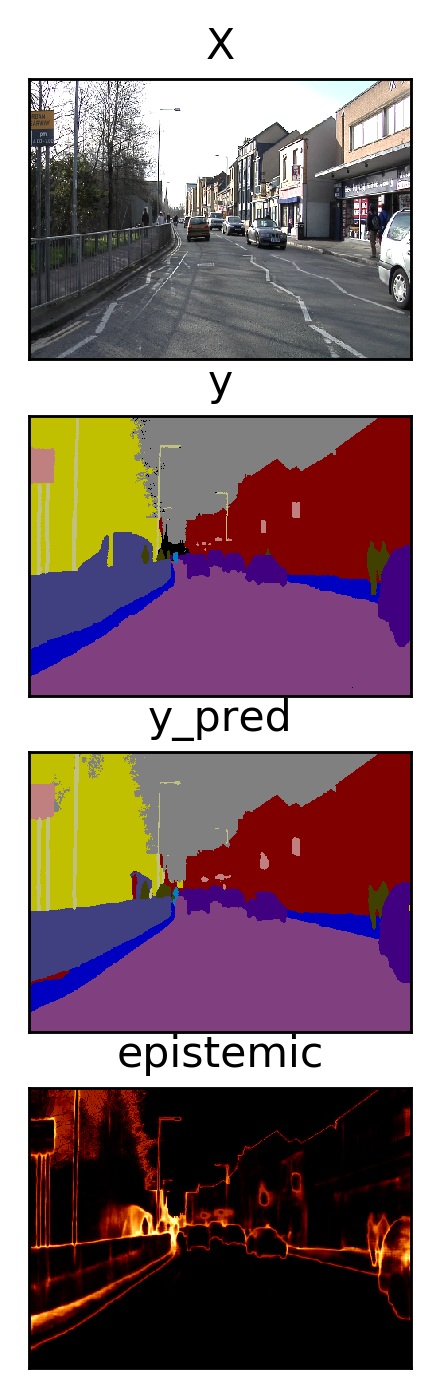

In [10]:
_ = camvid.plot(X=X[1], y=y[1], y_pred=p[1], epistemic=s[1], order=['X', 'y', 'y_pred', 'epistemic'])

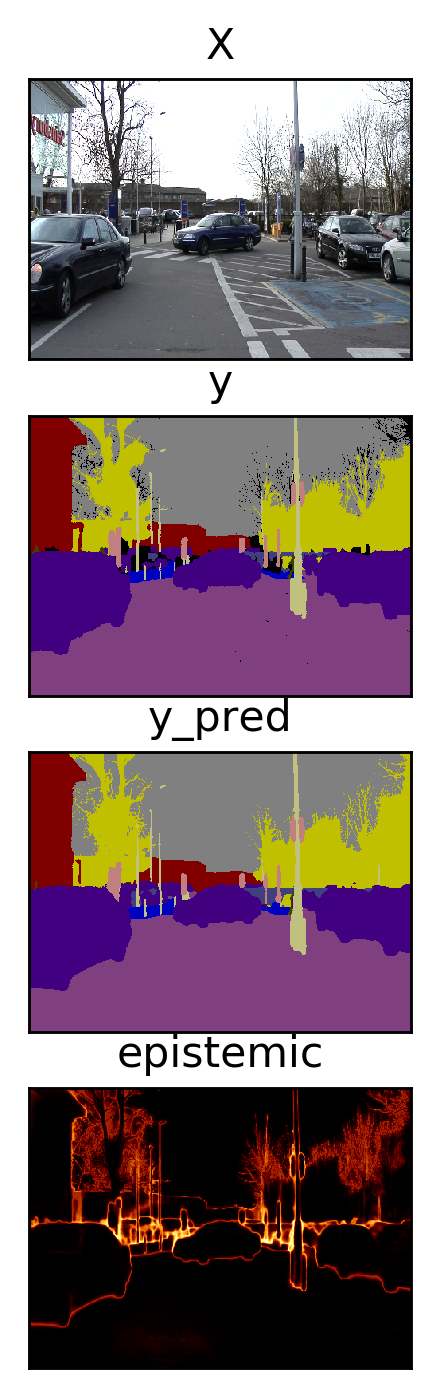

In [11]:
_ = camvid.plot(X=X[2], y=y[2], y_pred=p[2], epistemic=s[2], order=['X', 'y', 'y_pred', 'epistemic'])

## Validation

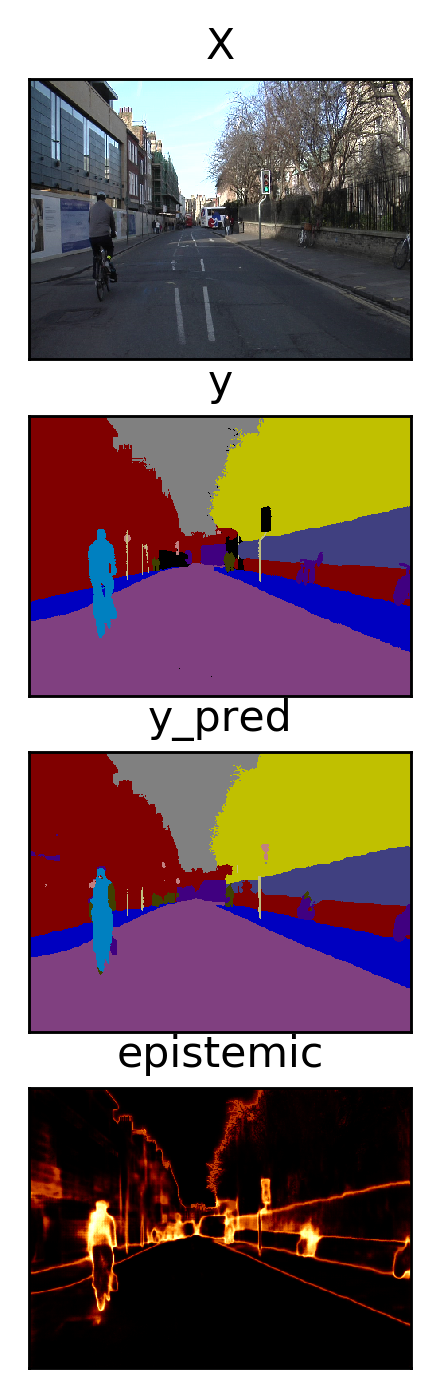

In [12]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

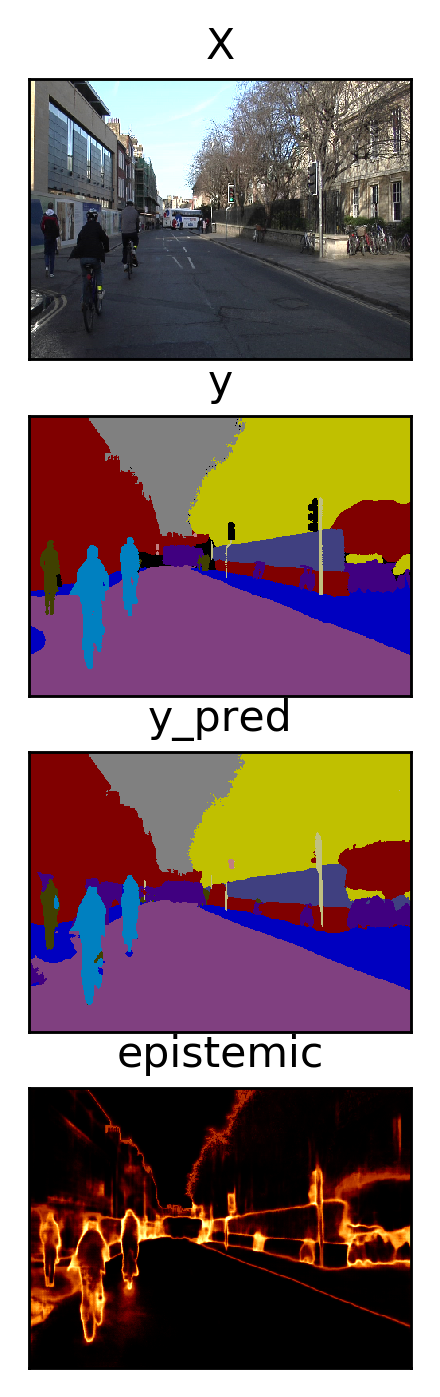

In [13]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

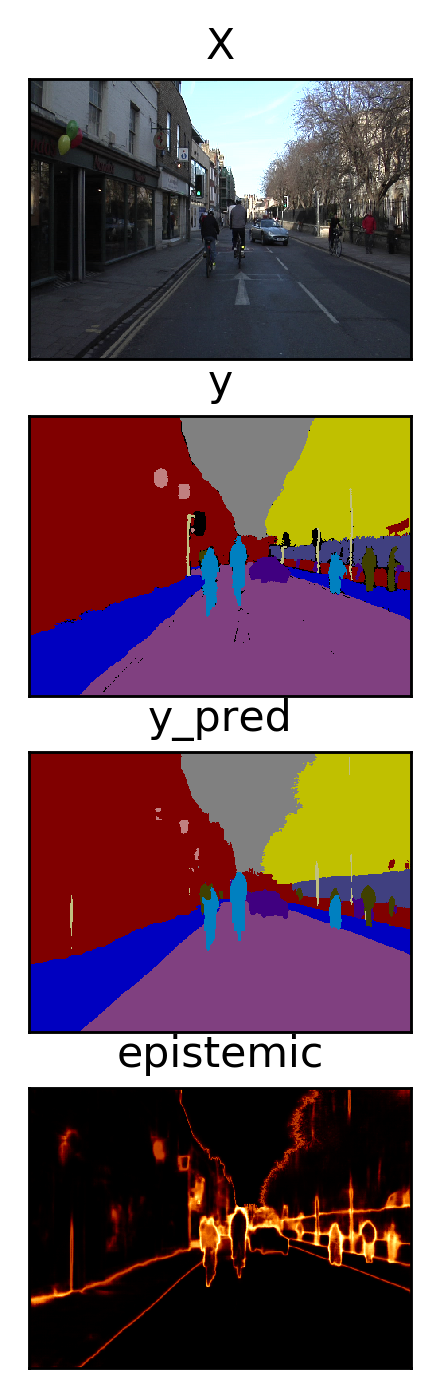

In [14]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

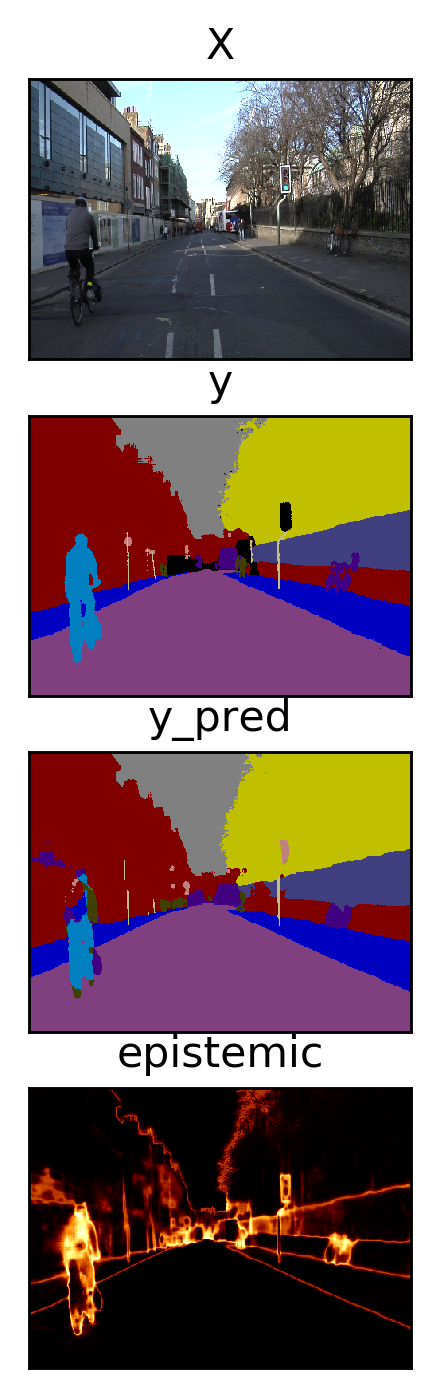

In [15]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
_ = camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

## Test

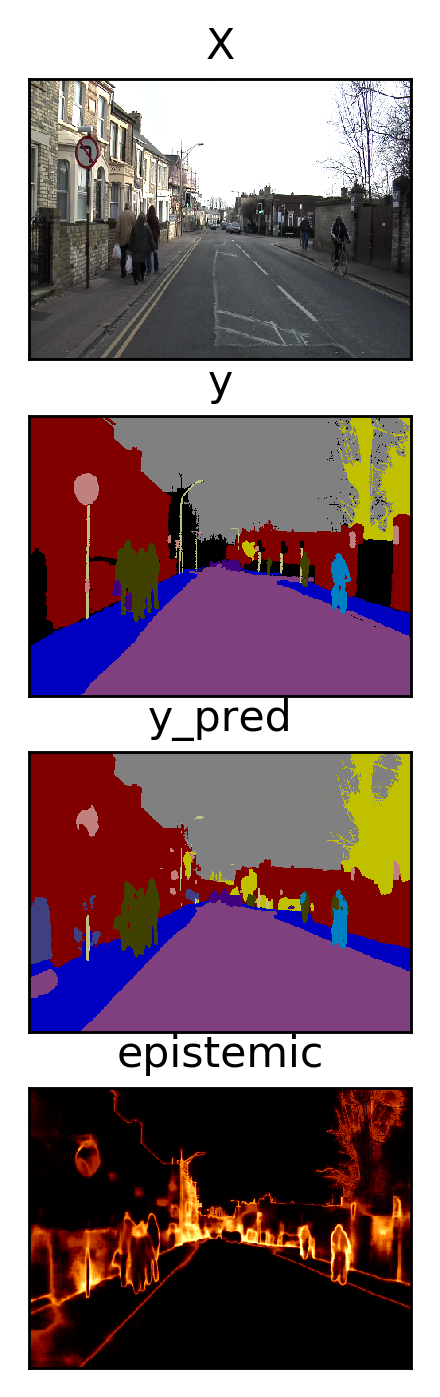

In [16]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/bayesian-tiramisu/epistemic/0.png', transparent=True, bbox_inches='tight')

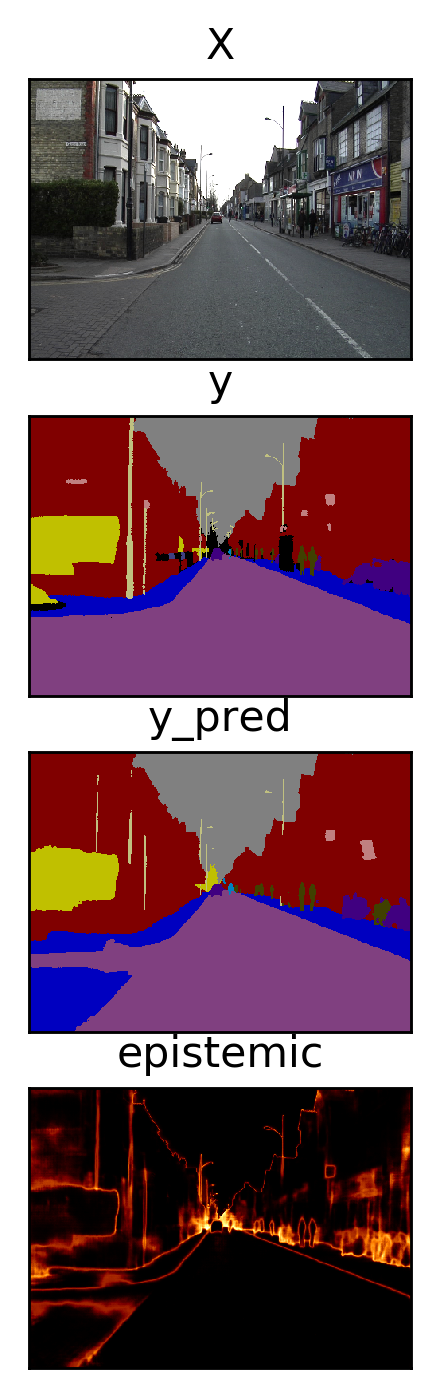

In [17]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/bayesian-tiramisu/epistemic/1.png', transparent=True, bbox_inches='tight')

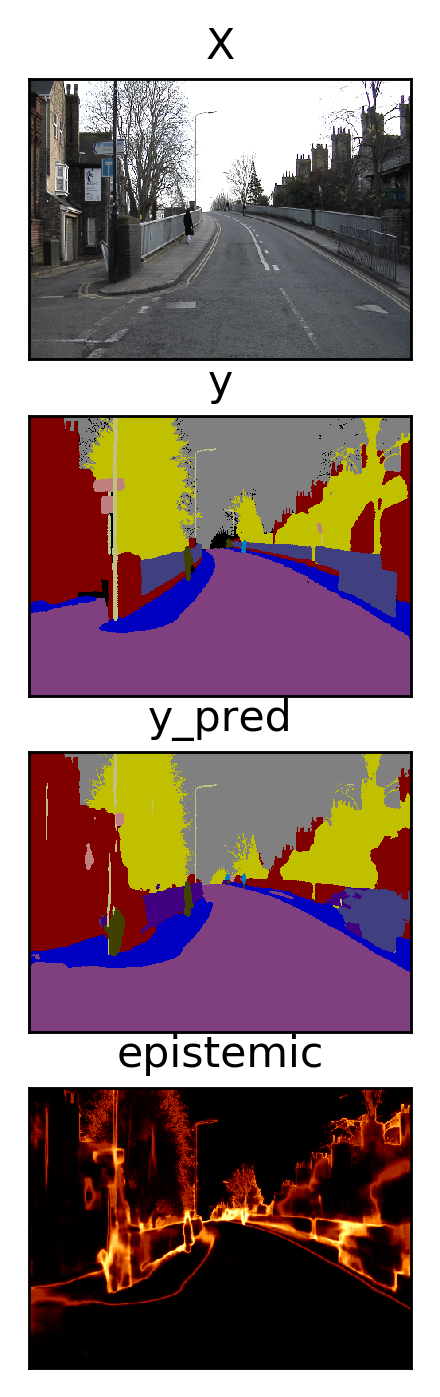

In [18]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/bayesian-tiramisu/epistemic/2.png', transparent=True, bbox_inches='tight')

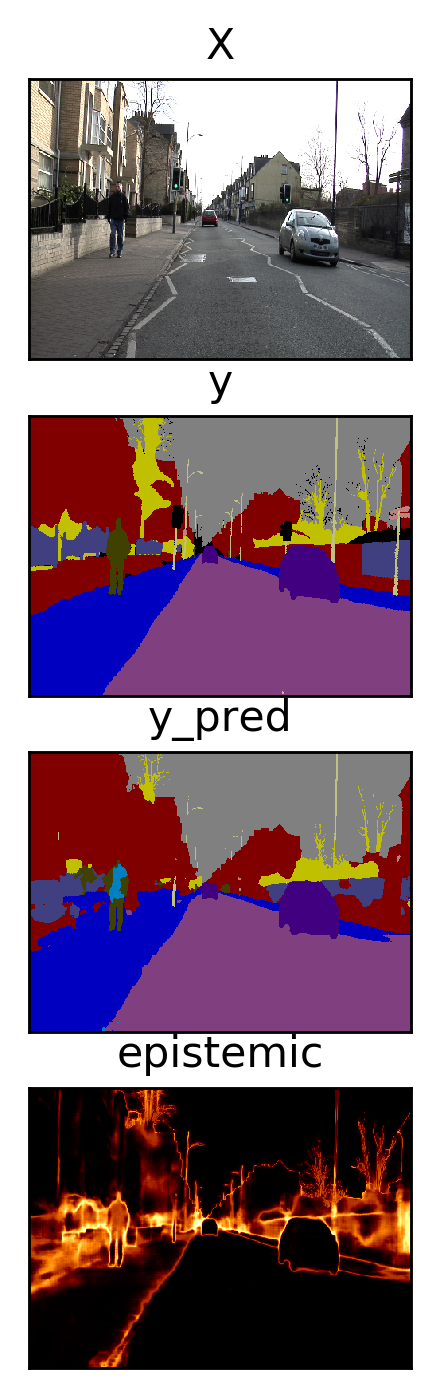

In [19]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
fig = camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])
fig.savefig('img/bayesian-tiramisu/epistemic/3.png', transparent=True, bbox_inches='tight')

# Video

In [20]:
model.simulations = 7

In [ ]:
video_file = '0005VD.mp4'
video_path = camvid.videos.abs_path(video_file)
out_path = 'img/bayesian-tiramisu/epistemic/{}'.format(video_file)

In [ ]:
predict_video.predict_video(video_path, out_path, camvid11, model, predict.predict_epistemic)

  0%|          | 26/6600 [00:32<2:18:02,  1.26s/it]